In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [26]:
p = {
"α" : 0.5,
"β" : 0.5,
"τ_f" : 100,
"N" : 1000,
"x_min" : 0,
"x_max" : 10}

In [19]:
def euler_noisy(p):

	Δt = p["τ_f"] / p["N"]
	states = [random.randint(p["x_min"], p["x_max"])] 
	t = 0
	t += Δt

	while t < p["τ_f"]:
		states[-1] = max(0, states[-1])

		#Define noise

		D = p["α"] + p["β"]

		states.append(states[-1] + (p["α"] - p["β"]) \
                      * Δt + np.random.normal(0, D * Δt))

		t += Δt

	return states


def simulator(n_sims):
	states_all = []

	for i in range(n_sims):
		states_all.append(euler_noisy(p))

	return states_all

'\nWith α = β -> Random Walk\nIf α != β -> Drift exists\n'

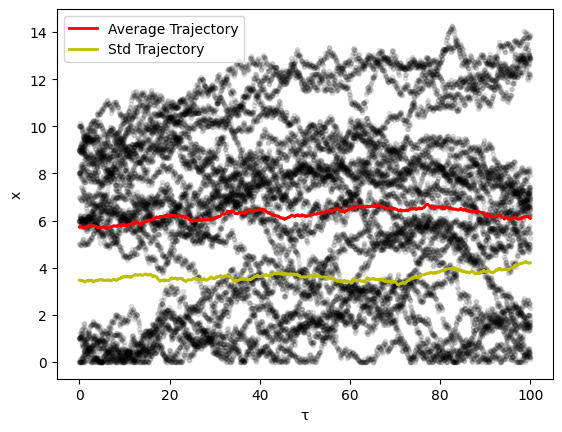

In [28]:
Δt = p["τ_f"] / p["N"]
states_all = simulator(25)
t = np.arange(0, p["τ_f"] + Δt, Δt)

for state in states_all:
    plt.plot(t, state, "k.", alpha = 0.1)


plt.plot(t, np.mean(states_all, axis = 0), "r-", label = "Average Trajectory", lw = 2)
plt.plot(t, np.std(states_all, axis = 0), "y-", label = "Std Trajectory", lw = 2)

plt.xlabel("τ")
plt.ylabel("x")
plt.legend()
"""
With α = β -> Random Walk
If α != β -> Drift exists
"""